### Import necessary modules

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df = vv.dataset_modelling_version(iteration_code="0013_20220704", show_not_used=True)
#df = vv.dataset_modelling_version(iteration_code="0014_20220708")
print(df.shape)
#df = df.head(20)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:298: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 14350/40144/34561/35024 ==> 14350/30622/30417/30425
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Bexley',
       'borough_name_City of London', 'borough_name_Croydon',
       'borough_name_Ealing', 'borough_name_Enfield', 'borough_name_Greenwich',
       'borough_name_Havering', 'borough_name_Hillingdon',
       'borough_name_Hounslow', 'borough_name_Islington',
       'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_Redbridge',
       'borough_name_Sutton', 'borough_name_Tower Hamlets',
       'borough_name_Waltham Forest', 'borough_name_Wandsworth',
       'borough_name_Westminster', 'analyticsProperty.propertyType_Bungal

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
124255940,600000.0,51.489984,0.003065,0.5,2.0,2.0,12.0,20220623.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
85695831,515000.0,51.496228,0.011951,0.4,2.0,1.0,16.0,20220614.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
123367715,520000.0,51.473270,0.026620,0.8,2.0,2.0,13.0,20220514.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123356906,520000.0,51.492888,0.064877,0.2,2.0,2.0,9.0,20220513.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
113979359,525000.0,51.486130,0.015960,0.2,3.0,1.0,15.0,20210924.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
123375440,525000.0,51.456568,0.037570,0.6,3.0,1.0,22.0,20220514.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
114500093,525000.0,51.479214,0.083513,0.7,3.0,2.0,18.0,20211007.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
121540949,525000.0,51.467990,0.066270,0.8,4.0,2.0,15.0,20220325.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
121071764,525000.0,51.481323,-0.024445,0.2,3.0,1.0,16.0,20220314.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0


### Get the property listings data and store in a dataframe

In [19]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
120474053,435000.0,51.334831,-0.118817,0.3,2.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
80138421,425000.0,51.376435,-0.084635,0.1,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
96576997,400000.0,51.343284,-0.139142,1.0,2.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124004333,400000.0,51.505680,-0.335640,0.4,NaN,1.0,15.0,20220617.0,4.0,0,...,0,0,0,0,1,0,0,0,1,0
122145023,375000.0,51.511062,-0.319344,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,0,1,0,0,0,0,0
122146472,375000.0,51.511020,-0.319358,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,0,1,0,0,0,1,0
122018636,350000.0,51.507730,-0.303430,0.5,NaN,1.0,7.0,20220406.0,4.0,0,...,0,0,0,0,1,0,0,0,1,0
85381386,365000.0,51.505340,-0.263075,0.2,NaN,1.0,5.0,20220531.0,4.0,0,...,0,0,0,0,1,0,0,0,0,1
121986209,600000.0,51.519830,-0.090230,0.1,NaN,1.0,10.0,20220405.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
median_bathroom = df['bathrooms_model'].median()
df['bathrooms_model'].fillna(median_bathroom, inplace=True)
median_bedrooms = df['bedrooms_model'].median()
df['bedrooms_model'].fillna(median_bedrooms, inplace=True)
median_imageCount = df['analyticsProperty.imageCount'].median()
df['analyticsProperty.imageCount'].fillna(median_imageCount, inplace=True)
median_added = df['analyticsProperty.added'].median()
df['analyticsProperty.added'].fillna(median_added, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
print(len(sample_incomplete_rows))
sample_incomplete_rows


0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [21]:
print(len(df))
df = df.dropna()
print(len(df))

12994
12994


In [22]:
# df = df.dropna(subset="Price")
# df = df.dropna(subset=["analyticsProperty.added", 'location.latitude', 'location.longitude'])
df.isnull().any() == True

Price                                                False
location.latitude                                    False
location.longitude                                   False
distance_to_any_train                                False
bedrooms_model                                       False
bathrooms_model                                      False
analyticsProperty.imageCount                         False
analyticsProperty.added                              False
floorplan_count                                      False
borough_name_Barking and Dagenham                    False
borough_name_Barnet                                  False
borough_name_Bexley                                  False
borough_name_City of London                          False
borough_name_Croydon                                 False
borough_name_Ealing                                  False
borough_name_Enfield                                 False
borough_name_Greenwich                               Fal

## Prepare data for training the model

In [23]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
## Build a Random Forest model

In [24]:
df

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_SM,coarse_compass_direction_SW,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
124255940,600000.0,51.489984,0.003065,0.5,2.0,2.0,12.0,20220623.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
85695831,515000.0,51.496228,0.011951,0.4,2.0,1.0,16.0,20220614.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
123367715,520000.0,51.473270,0.026620,0.8,2.0,2.0,13.0,20220514.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123356906,520000.0,51.492888,0.064877,0.2,2.0,2.0,9.0,20220513.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
113979359,525000.0,51.486130,0.015960,0.2,3.0,1.0,15.0,20210924.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120100592,440000.0,51.573702,-0.432817,0.4,2.0,1.0,10.0,20220217.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
121041542,440000.0,51.519344,-0.453880,1.0,3.0,1.0,11.0,20220314.0,4.0,0,...,0,0,0,1,0,0,0,1,0,0
113743676,440000.0,51.535655,-0.457365,1.1,3.0,1.0,13.0,20210920.0,4.0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
from xgboost import XGBRegressor
import xgboost as xgb
# read in data
#dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
#dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
dtrain = X_train
dtest = y_train
dtrain = df
dtest = df
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
param = {'max_depth':2, 'eta':1, 'objective':'reg:squarederror' }
num_round = 2

#xgb2 = XGBRegressor()

bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
preds

array([436349.  , 343395.8 , 395393.88, 343395.8 , 480411.38, 395393.88,
       458104.  , 521366.5 , 521366.5 , 395393.88, 343395.8 , 521366.5 ,
       462534.4 , 343395.8 , 462086.8 , 521366.5 , 410536.34, 395393.88,
       458104.  , 436349.  , 395393.88, 395393.88, 480411.38, 343395.8 ,
       521366.5 , 521366.5 , 521366.5 , 521366.5 , 343395.8 , 436349.  ,
       462534.4 , 521366.5 , 395393.88, 521366.5 , 417148.88, 521366.5 ,
       436349.  , 343395.8 , 384350.94, 395393.88, 514084.88, 436349.  ,
       521366.5 , 521366.5 , 343395.8 , 395393.88, 458104.  , 343395.8 ,
       521366.5 , 480411.38, 462534.4 , 458104.  , 458104.  , 462086.8 ,
       521366.5 , 343395.8 , 395393.88, 343395.8 , 343395.8 , 521366.5 ,
       436349.  , 514084.88, 521366.5 , 395393.88, 462534.4 , 458104.  ,
       395393.88, 436349.  , 521366.5 , 395393.88, 462086.8 , 521366.5 ,
       343395.8 , 343395.8 , 395393.88, 436349.  , 343395.8 , 521366.5 ,
       521366.5 , 521366.5 , 436349.  , 343395.8 , 

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42
)

use_ada_boost = True
if use_ada_boost:
    regressor = regr_2
else:
    regressor = regr_1

#regr_1.fit(X, y)
#regr_2.fit(X, y)
#y_1 = regr_1.predict(X)
#y_2 = regr_2.predict(X)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

#regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Evaluate the model on the test data

In [28]:
print(type(y_test.values))
print(type(y_pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
metrics.mean_squared_error(y_test.values, y_pred)

7419982129.512215

##

In [30]:
#metrics.accuracy_score(y_test.values, y_pred)
regressor.score(X_test, y_test)
#regressor.score(X, y)

0.39029634343115027

In [31]:
sorted(zip(y_test,y_pred),reverse=True)

[(600000.0, 535817.0719257541),
 (600000.0, 515191.91923271073),
 (600000.0, 514740.44096950744),
 (600000.0, 514740.44096950744),
 (600000.0, 514740.44096950744),
 (600000.0, 514740.44096950744),
 (600000.0, 514740.44096950744),
 (600000.0, 514740.44096950744),
 (600000.0, 514740.44096950744),
 (600000.0, 510646.7917570499),
 (600000.0, 510646.7917570499),
 (600000.0, 510646.7917570499),
 (600000.0, 510646.7917570499),
 (600000.0, 510646.7917570499),
 (600000.0, 510646.7917570499),
 (600000.0, 508887.04125950055),
 (600000.0, 506120.6701260193),
 (600000.0, 501302.30922551255),
 (600000.0, 491871.12488928257),
 (600000.0, 491268.82235701906),
 (600000.0, 484594.8551336146),
 (600000.0, 475644.9318561873),
 (600000.0, 473156.4539579968),
 (600000.0, 473156.4539579968),
 (600000.0, 473156.4539579968),
 (600000.0, 472713.2738095238),
 (600000.0, 472041.56176470587),
 (600000.0, 472041.56176470587),
 (600000.0, 451123.3028443949),
 (600000.0, 451123.3028443949),
 (600000.0, 451123.3028443

In [32]:
y_pred = regressor.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])
true_vs_pred

,actual,predicted
0,600000.0,535817.071926
1,600000.0,515191.919233
2,600000.0,514740.440970
3,600000.0,514740.440970
4,600000.0,514740.440970
5,600000.0,514740.440970
6,600000.0,514740.440970
7,600000.0,514740.440970
8,600000.0,514740.440970
9,600000.0,510646.791757


In [33]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

7419982129.512215

<AxesSubplot:xlabel='actual', ylabel='predicted'>

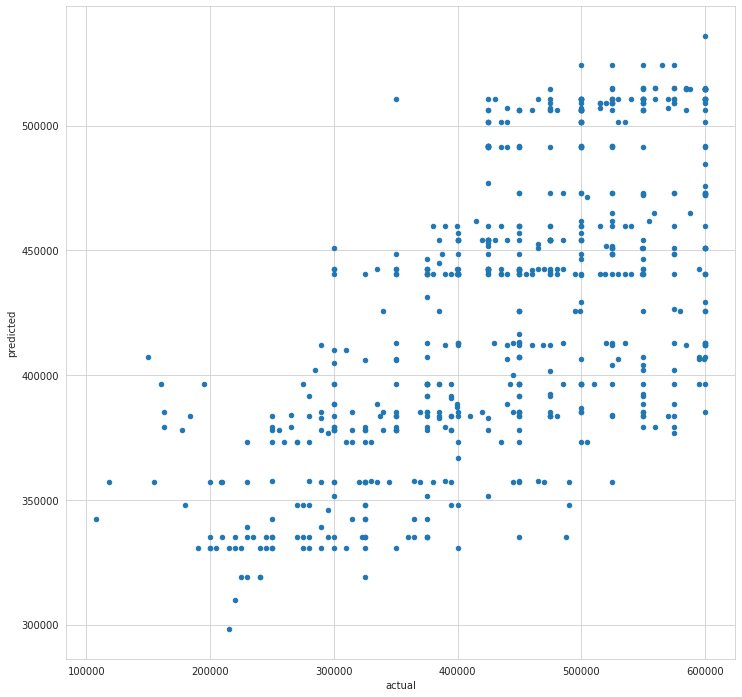

In [34]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))